tp calculadora de indices GINI

1- consulte los datos del índice GINI de argentina en la siguiente api rest https://api.worldbank.org/v2/en/country/all/indicator/SI.POV.GINI?
 Fetch the data: Use the requests library to send a GET request to the API and obtain the JSON response.


2- Extract the data: The data variable now contains a list of dictionaries. Each dictionary has the year and the corresponding GINI Index value for Argentina.

Usando C para convertir datos string a del índice GINI a enteros (acá explica cómo usar c en google colab, fuente https://www.youtube.com/watch?v=zuKeHPZWMYE)

Creando la librería para tratar los datos en C:

Compilamos la librería con gcc: Es el compilador de C de GNU
-c le dice a gcc que solo compile el archivo fuente y no lo enlaze. La opción -fPIC le dice a gcc que genere código posicion-independiente, lo que es necesario para crear bibliotecas compartidas.

 Crea la biblioteca compartida libfuncion.so a partir del archivo objeto funcion.o:
 -shared: opción de compilación que indica a gcc que debe generar una biblioteca compartida en lugar de un ejecutable. -W: opción de compilación que habilita advertencias -o especifica el nombre del archivo de salida funcion.o: Es el archivo objeto que se está compilando y enlazando en la biblioteca compartida.

Ahora que hemos terminado con C vamos a crear un wrapper con ctypes para poder usar la librería de C con Python y poder llamar sus funciones:


--------------------------------------------------
bruno + mingo + gpt

Datos Obtenidos


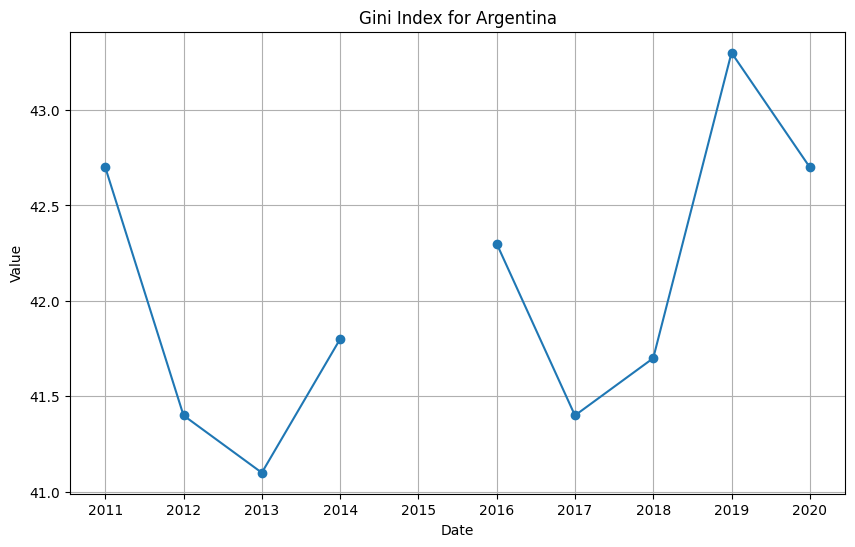

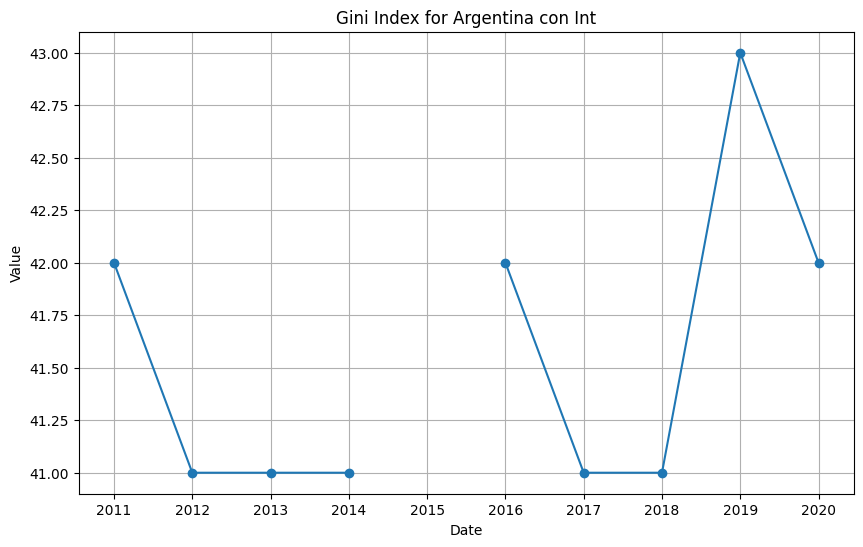

In [18]:
import requests
import json
import matplotlib.pyplot as plt
import datetime

def obtener_indice_gini():
    url = "https://api.worldbank.org/v2/en/country/ARG/indicator/SI.POV.GINI?format=json&date=2011:2020"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        print("Datos Obtenidos")
        # Verificamos si hay datos para Argentina
        """
        la respuesta de la API de la World Bank consiste en una lista de dos elementos:
        el primer elemento es un objeto de metadatos y el segundo elemento es la lista de datos reales que estamos buscando.
        Por lo tanto, data[1] accede a la lista de datos reales.
        """
        if len(data) >= 1 and data[1]:

            # Filtramos los datos para Argentina. Crea una lista que contiene
            #solo los elementos de data[1] que corresponden a datos para Argentina

            # Filter data based on country name
            argentina_data = [d for d in data[1] if d["country"]["value"] == "Argentina"]
            # Extraer los valores de "date" y "value"
            dates = [d["date"] for d in argentina_data]
            values = [d["value"] for d in argentina_data]

            dates.reverse()
            values.reverse()
            #print(dates)
            #print(values)

            # Extraemos los valores de los índices GINI
            indices_gini=[]
            indices_gini.append(dates)
            indices_gini.append(values)
            return indices_gini

        else:
            print("No hay datos disponibles para Argentina.")
            return None

    else:
        print("Error al obtener datos:", response.status_code)
        return None



#Creamos librería C
"""
%%writefile convertirFloatAEntero.c

int convertirFloatAEntero(float numeroFloat) {
  int numeroEntero = (int)numeroFloat; // Convertir el número float a un entero
  return numeroEntero;
}
"""
#compilamos
!gcc -c -fPIC convertirFloatAEntero.c -o convertirFloatAEntero.o
!gcc -shared -W -o libconvertirFloatAEntero.so ./convertirFloatAEntero.o

# Importamos la librería ctypes
import ctypes

# Cargamos la libreria
libconvertirFloatAEntero = ctypes.CDLL('./libconvertirFloatAEntero.so')

# Definimos los tipos de los argumentos de la función factorial
libconvertirFloatAEntero.convertirFloatAEntero.argtypes = (ctypes.c_float,)

# Definimos el tipo del retorno de la función factorial
libconvertirFloatAEntero.convertirFloatAEntero.restype = ctypes.c_int

# Creamos nuestra función factorial en Python
# hace de Wrapper para llamar a la función de C
def convertirFloatAEntero(num):
    return libconvertirFloatAEntero.convertirFloatAEntero(num)



if __name__ == "__main__":
    indices_gini_argentina = obtener_indice_gini()
    if indices_gini_argentina is not None:
        # Graficar los valores del índice GINI
        plt.figure(figsize=(10, 6))
        plt.plot(indices_gini_argentina[0], indices_gini_argentina[1], marker='o') #0 dates 1 values
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title('Gini Index for Argentina')
        plt.grid(True)
        plt.show()

        # Convert values to integers with C
        values_int = []
        for i in range(len(indices_gini_argentina[1])):
          if indices_gini_argentina[1][i] is not None:
            #se llama a la función de C
            values_int.append(convertirFloatAEntero(indices_gini_argentina[1][i]))
          else: values_int.append(None)

        # Graficar los valores del índice GINI con enteros
        plt.figure(figsize=(10, 6))
        plt.plot(indices_gini_argentina[0], values_int, marker='o') #0 dates 1 values
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title('Gini Index for Argentina con Int')
        plt.grid(True)
        plt.show()